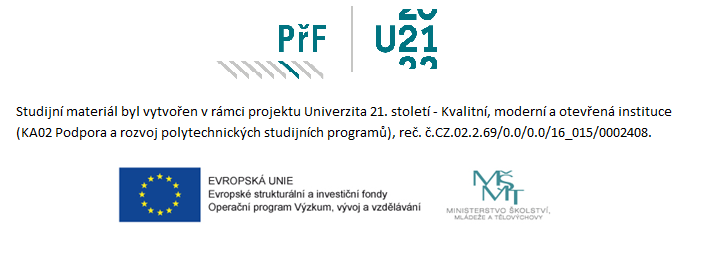

# Rozhodovací stromy

Rozhodovací stromy (Decision tree) jsou algoritmem strojového učení s učitelem vhodným jak pro klasifikaci, tak regresi. Jejich konstrukce spočívá ve vytvoření jednoduchých pravidel, která nám rozdělují příznakový prostor na menší a menší oblasti, tak, že cílová proměnná, daná třída pro klasifikaci, či hodnota predikované veličiny, je v dané oblasti téměř konstantní.

Na obrázku, níže vlevo, je ukázka rozhodovacího stromu pro klasifikaci, např. zda si daný zákazník koupí počítač. Vidíme, že hloubka stromu je dva. Strom není binární, neboť má v první úrovni více větvení. Na druhém obrázku vpravo je ukázána aproximace funkce pomocí rozhodovacího stromu. Tedy je použit rozhodovací strom pro úlohu regrese. Hloubka stromu je opět dva. Všimněte si, že počet hodnot, pomocí kterých je aproximována veličina na ose $y$, je čtyři, což odpovídá binárnímu stromu o hloubce dva.

Klasifikace | Regrese
- | -
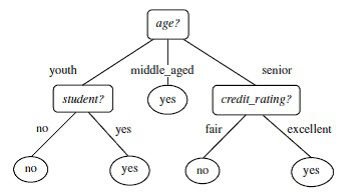|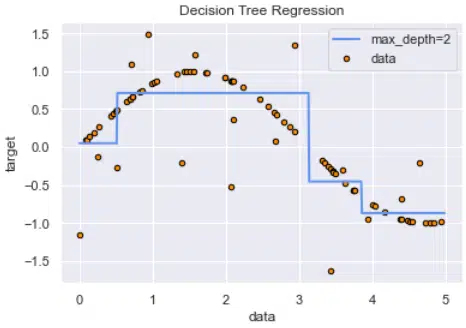
zdroj: https://www.kdnuggets.com/2016/10/decision-trees-concise-technical-overview.html | zdroj: https://www.jcchouinard.com/regression-in-machine-learning/#dt_reg

Jednou ze základních vlastností stromů je, že jsou bezparametrické, vyjma požadované hloubky stromu. Mezi výhody stromů patří to, že mají malé nároky na různé úpravy dat, jako je škálování, či že umí pracovat jak s kategorickými, tak i s numerickými daty. Jsou snadno interpretovatelné, neboť víme na základě jakého pravidla (cesta ve stromu a hodnoty příznaků) došlo k danému rozhodnutí.

Na druhou stranu mají i nevýhody. Příkladem je někdy špatná schopnost generalizace při konstrukci stromů velkých hloubek. Generalizací rozumíme to, že na tréninkových datech algoritmus funguje dobře, ale na testovacích datech (neznámých) má výrazně horší úspěšnost. Tedy model se chová spíše jako paměť a nedošlo ke správnému naučení.
 Díky citlivosti na nevyvážená data, tj. když je výrazný nepoměr mezi počtem zástupců tříd, bývá strom *biasovaný* (ovlivněný) četnějšími třídami. Dále mohou stromy být citlivé na změnu dat, tj. malá změna v trénovacích datech vede ke konstrukci velmi odlišného stromu.

Pro konstrukci stromů je používána celá řada algoritmů:


*   Iterative Dichotomiser 3 - [ID3](https://en.wikipedia.org/wiki/ID3_algorithm)
*   [C4.5](https://en.wikipedia.org/wiki/C4.5_algorithm)
*   Classification And Regression Tree - [CART](https://www.researchgate.net/profile/Dan-Steinberg/publication/265031802_Chapter_10_CART_Classification_and_Regression_Trees/links/567dcf8408ae051f9ae493fe/Chapter-10-CART-Classification-and-Regression-Trees.pdf)

V daším se seznámíme jen s principem rozhodovacích stromů. Pro praktické použití budeme používat knihovnu [sklearn](https://scikit-learn.org/stable/modules/tree.html)

#### Úkoly pro samostatnou činnost
Seznamte se s rozhodovacími stromy v knihovně *sklearn* na odkazu uvedeném výše.



## Principy konstrukce rozhodovacího stromu

V dalším budeme postupovat dle [Sebastian Raschka](https://sebastianraschka.com/blog/2021/ml-course.html#part-3-tree-based-methods) a jeho knihy [Python Machine Learning, 3rd Edition](https://sebastianraschka.com/books/#python-machine-learning-3rd-edition).

### Impurita
Princip konstrukce rozhodovacích stromů spočívá v tom, že postupně přidáváme do stromu jednotlivá dělící kritéria (uzly), tak, aby nově vzniklé množiny byly co nejvíce stejnorodé, tedy aby v nich byla maximálně zastoupena jedna z $c$ tříd. Pokud chceme charakterizovat to, zda prvky nějaké množiny $m$ jsou stejnorodé, musíme určovat její *impurity* (ne/čistotu).
 K tomu lze použít následující tři metriky.

**Entropie**:
\begin{equation}
I_H(m) = -\sum_{i=1}^c p(i|m)\log_2(p(i|m)),
\end{equation}
kde $p(i|m)$ představuje pravděpodobnost (reálně četnost) třídy $i$ v množině $m$. Znaménko mínus je zde proto, že pravděpodobnosti $p(i|m)\le1$ a tedy daný logaritmus vychází záporný. Dále, pro případ  $p(i|m)=0$, tedy pro případ, že nějaká třída není v $m$ zastoupena vůbec, definujeme $p(i|m)\log_2(p(i|m))=0$. V případě dvou a více tříd je entropie maximální,tehdy, když jsou třídy v $m$ zastoupeny rovnoměrně. Naopak, pokud jsou v $m$ jen prvky jedné třídy, pak je entropie nulová. V ukázce níže je navíc přidáno normování, protože maximální $I_H(m)=1$.

**Gini impurity**
\begin{equation}
I_G(m) = -\sum_{i=1}^c p(i|m)(1-p(i|m))=1-\sum_{i=1}^c p(i|m)^2.
\end{equation}
Opět jako v případě entropie, je maximální, když jsou zástupci jednotlivých tříd zastoupeny v $m$ rovnoměrně, a nulová, pokud je $m$ stejnorodá. Její průběh je obdobný průběhu entropie, viz ukázka níže.

Další příkladem můžem být impurita založená na **chybě klasifikace**:
\begin{equation}
I_E(m)=1-\max_{i=1,\ldots,c}(p(i|m)).
\end{equation}
Opět je jasně vidět, že v případě, že množina $m$ je stejnorodá, tak $I_E(m)=0$. Takto definovaná impurita nemá v maximu derivaci a z toho důvodu může způsobovat problém při případné numerické optimalizaci.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log2
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


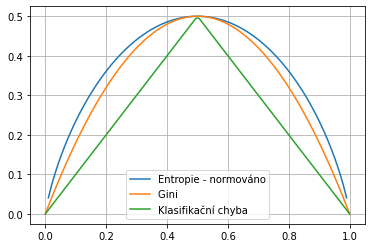

In [ ]:
# prubeh jednotlivych impurit pro dve tridy
import matplotlib.pyplot as plt
import numpy as np

p=np.linspace(0,1,100) # generuj pravdepodobnosti 0 az 1
Ih = -(p*np.log2(p) + (1-p)*np.log2(1-p))
Ig = 1 - (p**2+(1-p)**2)
Ie = 1-np.maximum(p,1-p)
plt.plot(p, Ih/2, label = "Entropie - normováno")
plt.plot(p, Ig, label = "Gini ")
plt.plot(p, Ie, label = "Klasifikační chyba")
plt.grid()
plt.legend()

#### Úkol pro samostatnou činnost

Napište funkci, kde vstupem je pole (seznam) hodnot, kde hodnoty mají význam počtu prvků připadajících do dané kategorie a výstupem je $I_H(m)$.


#### Úkol pro samostatnou činnost
Jako malé matematické cvičení ověřte, minimálně pro úlohu se dvěma třídami, že impurita je maximální, když v $m$ je rovnoměrné zastoupení tříd. Uvědomte si, že pro dvě třídy, díky podmínce $p(0|m)+p(1|m)=1$, můžete vyjádřit jednu z pravděpodobností pomocí druhé.

### Výběr kritéria pro dělení

V dalším uvažujme konstrukci binárního klasifikačního stromu, tedy každý rodičovský uzel $D_p$ stromu má nejvýše dva potomky $D_{p,L}$ (levý) a $D_{p,R}$ (pravý). Při konstrukci stromu přídáváme podmínku typu zda příznak $f$ má hodnotu $\nu_f$. Dochází tak postupně k procházení všech příznaků a pro každý příznak se testují jeho všechny možné hodnoty $\nu_f$. Vybere se takové dělení, které maximalizuje tzv. **informační zisk**:
\begin{equation}
IG(D_p,f,\nu_f) = I(D_p) - \frac{\#D_{p,L}}{\#D_p}I(D_{p,L})-\frac{\#D_{p,R}}{\#D_p}I(D_{p,R}),
\end{equation}
kde pomocí $I(.)$ je značena impurita příslušného potomka (L,R). Členy $\frac{\#D_{p,L}}{\#D_p}$ a $\frac{\#D_{p,R}}{\#D_p}$ představují váhy pro impuritu, neboť $\#D_{p,L}$, resp. $\#D_{p,R}$ značí počet prvků v daných potomcích a $\#D_p$ značí počet prvků v rodiči. Tedy postupně dochází přidáváním podmínek ke snižování impurity. Algoritmus preferuje co nejrychlejší snížení impurity.

**Poznámka**
Výše uvedený postup zhruba odpovídá algoritmu ID3, který je navržen pro diskrétní hodnoty jednotlivých atributů. V případě spojitých hodnot daného atributu je možné buď hodnoty diskretizovat, nebo použít algoritmus *CART*.

**Poznámka**
Je možné vybrat i na základě jiných kritérií, např. chi-kvdarát testu.

### Prořezávání stromů - prunig

Rozhodovací stromy mají jednu nevýhodu a to, že mají tendenci se přeučovat. Pokud nebudeme omezovat délku stromu, tak se algoritmus může chovat jako pamět na tréninková data. Mohou se vytvořit velmi hluboké stromy, kde výsledné [listy](https://cs.wikipedia.org/wiki/List_(graf)) obsahují jen jednoprvkové množiny. Toto obvykle vede k tomu, že na tréninkových datech algoritmus klasifikuje úspěšně, ale na testovacích výrazně méně, více viz [zde](http://www.cs.cmu.edu/~awm/15781/slides/DTreesAndOverfitting-9-13-05.pdf).

V zásadě jsou dvě možnosti. Buď se použije tzv. *pre-pruning*, tedy je nastavena maximální hloubka stromu a není dovolen vytvořit strom větší hloubky než je dáno - princip [Occamova břitva](https://cs.wikipedia.org/wiki/Occamova_b%C5%99itva). Druhou možností je použití tzv. *post-pruningu*, kdy je nejprve vytvořen strom a pak dochází k postupnému odstraňování některých větví (pravidel).

## Praktická ukázka - klasifikace MNIST

Data set [MNIST](https://en.wikipedia.org/wiki/MNIST_database) je soubor ručně psaných číslic. Cílem je kategorizovat číslice do příslušnách kategorií. Obrázky jsou 28x28 pixelů. Pro naši úlohu použijeme zmenšený dataset v knihovně *sklearn* na 8x8 pixelů.
Vynecháme normování/standardizaci datasetu a použijeme defaultní nastavení algoritmu.

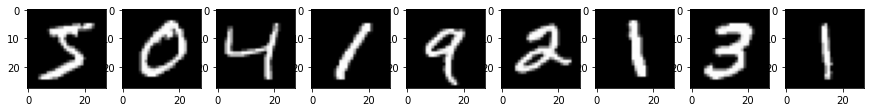

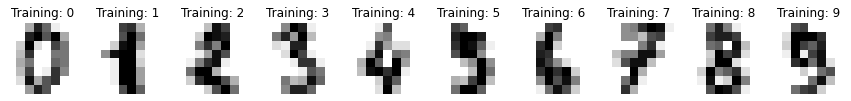

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets, metrics, tree
from sklearn.model_selection import train_test_split
# nacteni datasetu
digits = datasets.load_digits()

# prevzato z sklearn - vizualizace cislic
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(15, 4))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)
# priprava datasetu - prevod obrazku 8*8 na vektory
samples_count = len(digits.images)
data = digits.images.reshape((samples_count, -1))
# rozdeleni na jednotlive mnoziny, z duvodu reprodukovatelnosti predepiseme nahodny stav - random_state a pri kazdem spusteni to bude stejne
X_tr, X_test, y_tr, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=True, random_state=42)
# zde je nutno doplnit případnou standardizaci, či normalizaci
# .... viz samostaná práce

In [ ]:
# nauceni stromu a provedeni klasifikace na trenovacich datech
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_tr, y_tr)
predicted = clf.predict(X_tr)
print(f"Report klasifikace na trenovacich datech {clf}:\n{metrics.classification_report(y_tr, predicted)}")

Report klasifikace na trenovacich datech DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       145
           1       1.00      1.00      1.00       154
           2       1.00      1.00      1.00       144
           3       1.00      1.00      1.00       149
           4       1.00      1.00      1.00       135
           5       1.00      1.00      1.00       135
           6       1.00      1.00      1.00       146
           7       1.00      1.00      1.00       145
           8       1.00      1.00      1.00       144
           9       1.00      1.00      1.00       140

    accuracy                           1.00      1437
   macro avg       1.00      1.00      1.00      1437
weighted avg       1.00      1.00      1.00      1437



In [ ]:
predicted = clf.predict(X_test)
print(f"Report klasifikace na testovacich datech {clf}:\n{metrics.classification_report(y_test, predicted)}")

Report klasifikace na testovacich datech DecisionTreeClassifier(max_depth=5):
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        33
           1       0.44      0.25      0.32        28
           2       0.62      0.24      0.35        33
           3       0.42      0.82      0.55        34
           4       0.83      0.85      0.84        46
           5       0.98      0.94      0.96        47
           6       0.97      0.91      0.94        35
           7       0.86      0.71      0.77        34
           8       0.31      0.73      0.44        30
           9       1.00      0.28      0.43        40

    accuracy                           0.68       360
   macro avg       0.74      0.66      0.65       360
weighted avg       0.77      0.68      0.68       360



Porovnáním výsledků je vidět, že na testovacích datech je klasifikátor horší.
#### Úkoly pro samostanou činnost


1.   Ověřte vliv nastavení maximální hloubky stromu
2.   Ověřte vliv použití různých kritérií $I_H$, $I_G$, viz dokumentace [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).
3.   Ověřte vliv normalizace a standardizace na datasetu na výsledek.



## Použití regresních stromů

Na ukázce níže, je použit regresní strom pro aproximaci periodické funkce. Strom je naučen na intervalu $<0, 2\pi>$, kde dává i uspokojivé výsledky. Při posunu na interval $<2\pi, 4\pi>$ je však vidět, že aproximuje špatně.

Text(0.5, 1.0, 'Regrese na intervalu <2 pi,4 pi>')

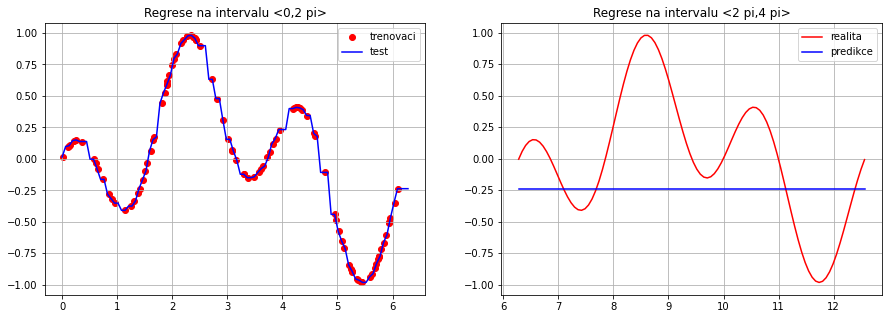

In [ ]:
# Pouziti regresnich stromu
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
# definice "nezname" funkce
def f(x):
  return np.sin(2*x)*np.cos(x+1)

#priprava dat
X_tr = 6.28*np.random.rand(100,1) #generuj na interval <0,2pi> trenovaci data
y_tr=f(X_tr)

X_test = np.linspace(0,6.28,100).reshape(100,1)
X_test_posun = np.linspace(6.28,2*6.28,100).reshape(100,1)

# nauceni stromu a predikce
reg = DecisionTreeRegressor(criterion="absolute_error") # pozor jina kriteria
reg.fit(X_tr,y_tr)
y_test = reg.predict(X_test)
y_test_posun = reg.predict(X_test_posun)

# vykresleni vysledku
plt.rcParams['figure.figsize'] = [15, 5]
figure, axis = plt.subplots(1, 2)

axis[0].scatter(X_tr,y_tr, label = "trenovaci", color='r')
axis[0].plot(X_test, y_test,label = "test", color = 'b')
axis[0].grid()
axis[0].legend()
axis[0].set_title("Regrese na intervalu <0,2 pi>")

axis[1].plot(X_test_posun,f(X_test_posun), label = "realita", color='r')
axis[1].plot(X_test_posun, y_test_posun,label = "predikce", color = 'b')
axis[1].grid()
axis[1].legend()
axis[1].set_title("Regrese na intervalu <2 pi,4 pi>")


#### Úkoly pro samostatnou činnost

Použijte regresní strom pro predikci v [Boston dataset](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). Vaším cílem je udělat predikci cen nemovitostí, tj. posledního čtrnáctého sloupečku pomocí ostatních.

**Srovnejte v MSE, MAE** s použitím modelu založeného na metodě nejmenších čtverců (naprogramujte sami, nebo použijte [OLS](https://www.statsmodels.org/dev/generated/statsmodels.regression.linear_model.OLS.html) ) a [knn regresoru](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html). Nezapomeňte provést úpravu a normováni datasetu.

# Seskupování stromů a lesy

Principy zde diskutované je možné použít i pro jiné algoritmy než jsou stromy. Základní myšlenka je *více hlav víc ví*, tedy budeme používat více stromů (hlav). Díky seskupování více klasifikátorů nám nevadí situace, kdy jeden klasifikátor nemusí být zas tak úspěšný, ale jako celek je seskupení klasifikátorů poměrně úspěšné a navíc redukuje přeučování. Poznamenejme, že se nemusí jednat jen o úlohu klasifikace, podobný přístup je možný použít i pro úlohu regrese.

V zásadě rozlišujeme dva algoritmy **bagging** a **boosting**. Oba dva přístupy se často používají, viz např. [sklearn](https://scikit-learn.org/stable/modules/ensemble.html).

## Bagging - Bootstrap Aggregating

V případě baggingu je celý dataset $D$ náhodně rozdělen na menší datasety $D_i$ tak, že $D=\cup_{i}D_i$ a zároveň pro některé dvojice platí $D_i \cap D_j \neq \emptyset$. Na každém z nich je naučen jeden dílčí klasifikátor. Na rozdíl od *boostingu* (viz dále) zde není provázanost jednotlivých klasifikátorů, tedy v principu se mohou učit paralelně. Výsledná klasifikace je dána většinovým hlasováním jednotlivých klasifikátorů. Více viz [zde](https://en.wikipedia.org/wiki/Bootstrap_aggregating). Příkladem jsou tzv. [náhodné lesy](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)(*RandomForest*). V případě konstrukce lesů, se navíc zužuje i příznakový prostor, viz parametr *max_features* [zde](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

## Boosting
V případě *boostování* spočívá hlavní myšlenka v tom, že se opět náhodně rozdělí původní dataset $D$ na dílčí datasety $D_i$, nyní ovšem k dělení dochází postupně. Nejprve je zkonstruován $D_1$ a je na něm naučen první klasifikátor. Část z příkladů v $D$, které první klasifikátor špatně klasifikuje, je přidána do $D_2$ a je zvýšena jejich důležitost (váhy). Na $D_2$ je naučen druhý klasifikátor. Toto celé se opakuje s předepsaným počtem opakování. Při učení jsou použity tzv. *slabé klasifikátory*, což si můžeme představit jako stromy s malou hloubkou. Síla algoritmu spočívá v tom, že každý další klasifikátor se učí na datech, kde předchozí selhal. O výsledku se rozhoduje váženým součtem dílčích klasifikátorů, kde váha je dána úspěšností klasifikátoru při učení.
Příkladem těchto algoritmů je [AdaBoost](https://en.wikipedia.org/wiki/AdaBoost), nebo [Gradient Tree Boosting](https://en.wikipedia.org/wiki/Gradient_boosting). Tyto a další jsou implementovány v knihovně [sklearn](https://scikit-learn.org/stable/modules/ensemble.html). Případně lze použít algoritmus [XGBOOST](https://xgboost.readthedocs.io/en/stable/).

Na ukázce níže je použití algoritmu *RandomForest* pro úlohu MNIST. Je zde vidět, že oproti použití samotného rozhodovacího stromu došlo ke zlepšení ve sledovaných metrikách.

#### Úkol pro samostatnou činnost
Na úloze MNIST porovnejte algoritmus *AdaBoost* s *RandomForest*.



In [ ]:
# klasifikace MNIST pomoci RandomForest
import matplotlib.pyplot as plt

from sklearn import datasets, metrics, tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier # pro nahodny les

# nacteni datasetu
digits = datasets.load_digits()
# priprava datasetu - prevod obrazku 8*8 na vektory
samples_count = len(digits.images)
data = digits.images.reshape((samples_count, -1))
# rozdeleni na jednotlive mnoziny - trenovaci a testovaci data
X_tr, X_test, y_tr, y_test = train_test_split(data, digits.target, test_size=0.2, shuffle=True, random_state=42)
# vytvoreni a nauceni klasifikatoru
forest = RandomForestClassifier(n_estimators=20)
forest = forest.fit(X_tr, y_tr)
# predikce a jeji zhodnoceni
predicted = forest.predict(X_test)
print(f"Report klasifikace na testovacich datech {forest}:\n{metrics.classification_report(y_test, predicted)}")

Report klasifikace na testovacich datech RandomForestClassifier(n_estimators=20):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.88      1.00      0.93        28
           2       1.00      1.00      1.00        33
           3       0.97      0.94      0.96        34
           4       0.98      0.98      0.98        46
           5       0.96      0.96      0.96        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.89      0.83      0.86        30
           9       0.95      0.90      0.92        40

    accuracy                           0.96       360
   macro avg       0.95      0.96      0.95       360
weighted avg       0.96      0.96      0.96       360



# Literatura:
1) [Blog](https://sebastianraschka.com/blog/2021/ml-course.html) autora knihy [Python Machine Learning, 3rd Edition](https://sebastianraschka.com/books/#python-machine-learning-3rd-edition):

RASCHKA, Sebastian a Vahid MIRJALILI. Python machine learning: machine learning
and deep learning with Python, scikit-learn, and TensorFlow. Birmingham: Pack pub-
lishing, 2017. ISBN 978-1-78712-593-3.

2)  Pro čtenáře s hlubším zájmem je k dispozici sbírka výukových materiálů ke knize [An Introduction to Statistical Learning](https://www.statlearning.com/) včetně
knihy samotné:

JAMES, Gareth, Daniela WITTEN, Trevor HASTIE a Robert TIBSHIRANI. An introduction to statistical learning: with applications in R. New York: Springer, [2013]. Springer texts in statistics, 103. ISBN 978-1461471370.

